In [0]:
import os
import numpy as np
import matplotlib.pylab as plt

import sys
#!{sys.executable} -m pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 

import sklearn.metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#from IPython.display import Image
#from scipy.stats import randint

In [46]:
#carrega a base iris do próprio sckit-learn
iris = load_iris()

# carregando todas as características em X e os rótulos (labels, targets) em y
X = iris.data
y = iris.target #Sepal Length, Sepal Width, Petal Length and Petal Width.

print("As características são: " , iris.feature_names)

As características são:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [47]:
#separando em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)

# imprime as dimensões das bases
print("Dimensões das bases de treinamento e teste:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Dimensões das bases de treinamento e teste:
(90, 4)
(60, 4)
(90,)
(60,)



Accuracy
 0.9666666666666667


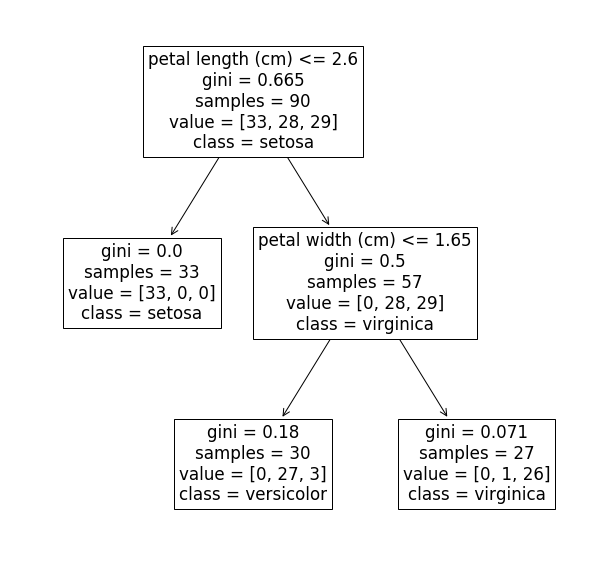

In [48]:
#cria o classificador
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2) #testar com (criterion='entropy')

#treina o classificador com a base de treinamento
clf = clf.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf.predict(X_test)

##########################
#Exercício 02 - A
#mostrar a acurácia
##########################
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)

##########################
#Exercício 02 - B
##Analise a árvore de decisão criada
##########################
#cria uma imagem para mostrar a árvore de decisão criada
plt.figure(figsize=(10,10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names);

In [49]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

knn_predict = neigh.predict(X_test)
print("KNN Accuracy: ", sklearn.metrics.accuracy_score(y_test, knn_predict))
# try this later: http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

KNN Accuracy:  1.0


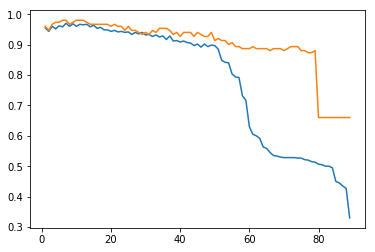

In [50]:
train_test_accuracies = {}
cross_val_accuracies = {}

for k in range(1,90):
    tt_clf_accuracy = []
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    for i in range(10):
        Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size = 0.4, random_state=i)
        knn_clf.fit(Xtrain, ytrain)
        knn_prediction = knn_clf.predict(Xtest)
        knn_acc = sklearn.metrics.accuracy_score(ytest, knn_prediction)
        tt_clf_accuracy.append(knn_acc)
    train_test_accuracies[k]=np.mean(tt_clf_accuracy)
    cv_scores = cross_val_score(knn_clf, iris.data,iris.target,cv=5)
    cross_val_accuracies[k]=np.mean(cv_scores)
    
plt.plot(train_test_accuracies.keys(), train_test_accuracies.values(), label='Train test split')
plt.plot(cross_val_accuracies.keys(), cross_val_accuracies.values(), label='Cross validation')
plt.show()



In [51]:
test_train_best_ks = [key  for (key, value) in train_test_accuracies.items() if value == max(train_test_accuracies.values())]
cv_best_ks = [key  for (key, value) in cross_val_accuracies.items() if value == max(cross_val_accuracies.values())]
print("Test Train split best Ks:", test_train_best_ks)
print("Cross Validation best Ks:", cv_best_ks)

Test Train split best Ks: [7]
Cross Validation best Ks: [6, 7, 10, 11, 12]


In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)

In [0]:
def print_metrics(estimator_name, ground_truth, prediction):
    print(estimator_name, "metrics:")
    print("Accuracy:", sklearn.metrics.accuracy_score(ground_truth, prediction))
    print("Precision:", sklearn.metrics.precision_score(ground_truth, prediction, average='macro'))
    print("Recall:", sklearn.metrics.recall_score(ground_truth, prediction, average='macro'))
    print("F-Measure:", sklearn.metrics.f1_score(ground_truth, prediction, average='macro'))
    print("Confusion matrix: \n", sklearn.metrics.confusion_matrix(ground_truth, prediction), "\n")

In [54]:
print_metrics("Decision Tree", y_test, preditor)
print_metrics("Naive Bayes", y_test, gnb_pred)
print_metrics("KNN", y_test, knn_predict)

Decision Tree metrics:
Accuracy: 0.9666666666666667
Precision: 0.9689754689754689
Recall: 0.9689754689754689
F-Measure: 0.9689754689754689
Confusion matrix: 
 [[17  0  0]
 [ 0 21  1]
 [ 0  1 20]] 

Naive Bayes metrics:
Accuracy: 0.9666666666666667
Precision: 0.9689754689754689
Recall: 0.9689754689754689
F-Measure: 0.9689754689754689
Confusion matrix: 
 [[17  0  0]
 [ 0 21  1]
 [ 0  1 20]] 

KNN metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-Measure: 1.0
Confusion matrix: 
 [[17  0  0]
 [ 0 22  0]
 [ 0  0 21]] 



In [0]:
from sklearn.datasets import fetch_openml
MNIST_X, MNIST_y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [56]:
MNIST_X_train, MNIST_X_test, MNIST_y_train, MNIST_y_test = train_test_split(MNIST_X, MNIST_y, train_size=0.1, test_size=0.05)
print(MNIST_X_train.shape, MNIST_y_train.shape)

#mnist_cross_val_accuracies = {}
#for k in range(1,8,2):
k=3
knn_clf = KNeighborsClassifier(n_neighbors=k)
mnist_cv_scores = cross_val_score(knn_clf, MNIST_X_train, MNIST_y_train, cv=3)
#mnist_cross_val_accuracies[k]=np.mean(mnist_cv_scores)
#mnist_best_ks = [key  for (key, value) in mnist_cross_val_accuracies.items() if value == max(mnist_cross_val_accuracies.values())]
#print(mnist_best_ks)
print("Cross validation score:", np.mean(mnist_cv_scores))

(7000, 784) (7000,)
Cross validation score: 0.9290029627788862


In [59]:
#plt.plot(mnist_cross_val_accuracies.keys(), mnist_cross_val_accuracies.values())
knn_clf.fit(MNIST_X_train, MNIST_y_train)
mnist_predict = knn_clf.predict(MNIST_X_test)
print_metrics("MNIST KNN", MNIST_y_test, mnist_predict)
#print("Accuracy:", sklearn.metrics.accuracy_score(MNIST_y_test, mnist_predict))
#print("Precision:", sklearn.metrics.precision_score(MNIST_y_test, mnist_predict, average='micro'))
#print("Recall:", sklearn.metrics.recall_score(MNIST_y_test, mnist_predict, average='micro'))
#print("F-Measure:", sklearn.metrics.f1_score(MNIST_y_test, mnist_predict, average='micro'))
#print("Confusion matrix: \n", sklearn.metrics.confusion_matrix(MNIST_y_test, mnist_predict))

MNIST KNN metrics:
Accuracy: 0.9365714285714286
Precision: 0.9393232491195732
Recall: 0.935514043102059
F-Measure: 0.936539526582138
Confusion matrix: 
 [[317   0   0   1   0   3   2   0   1   0]
 [  0 405   1   1   0   0   0   0   0   1]
 [  8  16 291   0   1   1   0   5   1   1]
 [  2   3   6 356   0   5   0   4   1   3]
 [  1   5   0   0 294   0   0   0   0  18]
 [  2   2   0  15   1 291   7   2   0   0]
 [  1   4   0   0   1   1 343   0   0   1]
 [  0  10   1   0   3   0   0 349   0  10]
 [  0   8   4  10   3   7   5   5 316   4]
 [  1   2   0   8   8   0   0   5   0 316]] 

